In [38]:
import json, sys
from pathlib import Path
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

sys.path.append("/mnt/data/datasets/LSA-T")
from type_hints import SignerData
from helpers.utils import compose
from helpers.get_score import get_score
from helpers.visualization import save_fig, group_items, get_sort_key


def gen_scores_plot(scores_s: pd.Series):
    scores_fig = scores_s.plot.bar(figsize=(5,5), color=color)
    scores_fig.set_xticklabels([f".{i}" for i in range(10)] + ["1"])
    plt.xticks(rotation=360)
    return scores_fig

plt.style.use("ggplot")
plt.rcParams.update({'font.size': 18})
color="dodgerblue"
figs_path = Path("./plots/signers")
figs_path.mkdir(exist_ok=True)

path = Path("../data/cuts/")
cuts = path.glob('**/*[_signer].json')

scores: list[list[float]] = []
for idx, cut in enumerate(cuts):
    with cut.open() as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data['scores'])

count      10.000000
mean     1488.000000
std      2328.930274
min        84.000000
25%       165.500000
50%       426.000000
75%      1447.250000
max      7100.000000
dtype: float64

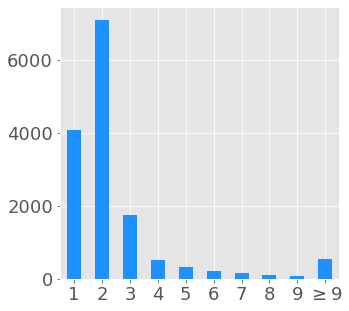

In [39]:
signers_am = Counter(group_items(map(compose(str, len), scores), lambda x: int(x)>=10, "$\geq$9"))
signers_s = pd.Series(signers_am).sort_index(key=get_sort_key("$\geq$9", 10))
display(signers_s.describe())
signers_fig = signers_s.plot.bar(figsize=(5,5), color=color)
plt.xticks(rotation=360)
save_fig(signers_fig, "signers_hist.png", figs_path)


count      11.000000
mean      980.909091
std      1932.954187
min        95.000000
25%       209.000000
50%       316.000000
75%       546.500000
max      6710.000000
dtype: float64

<AxesSubplot:>

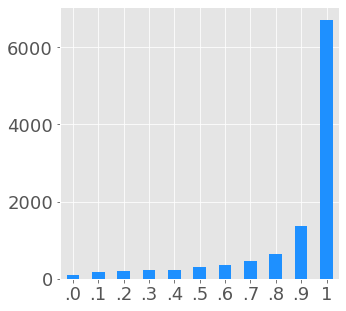

In [40]:
score_values = map(compose(lambda x: round(x,1), get_score), filter(lambda s: len(s) >= 2, scores))
scores_s = pd.Series(Counter(score_values)).sort_index()
display(scores_s.describe())
scores_fig = gen_scores_plot(scores_s)
display(scores_fig)
save_fig(scores_fig, "scores_hist.png", figs_path)

count      11.000000
mean      645.454545
std      1204.899196
min        78.000000
25%       163.000000
50%       223.000000
75%       376.500000
max      4207.000000
dtype: float64

<AxesSubplot:>

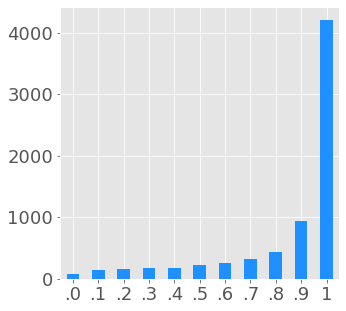

In [34]:
score_values_2 = map(compose(lambda x: round(x,1), get_score), filter(lambda s: len(s) == 2, scores))
scores_2_s = pd.Series(Counter(score_values_2)).sort_index()
display(scores_2_s.describe())
scores_2_fig = gen_scores_plot(scores_2_s)
display(scores_2_fig)
save_fig(scores_2_fig, "scores_2_hist.png", figs_path)

count      11.000000
mean      335.454545
std       728.394860
min        17.000000
25%        51.500000
50%        93.000000
75%       170.000000
max      2503.000000
dtype: float64

<AxesSubplot:>

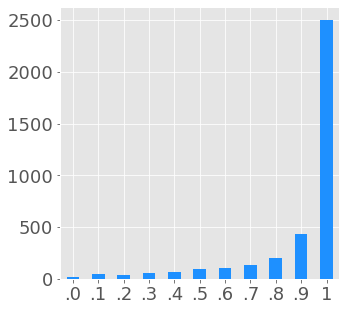

In [35]:
score_values_gt2 = map(compose(lambda x: round(x,1), get_score), filter(lambda s: len(s) > 2, scores))
scores_gt2_s = pd.Series(Counter(score_values_gt2)).sort_index()
display(scores_gt2_s.describe())
scores_gt2_fig = gen_scores_plot(scores_gt2_s)
display(scores_gt2_fig)
save_fig(scores_gt2_fig, "scores_gt2_hist.png", figs_path)

Nose keypoint confidence analisys

In [19]:
cuts = path.glob('**/*[_signer].json')

nose_conf: list[float] = []
for idx, cut in enumerate(cuts):
    if idx % 1000 == 0:
        print(idx)
    with cut.open() as datafile:
        signer_data: SignerData = json.load(datafile)
    nose_conf.extend(map(lambda kd: kd['keypoints'][2], signer_data['keypoints']))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


KeyboardInterrupt: 

/tmp/ipykernel_17378/1383009739.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nose_conf_s = pd.Series(nose_conf)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

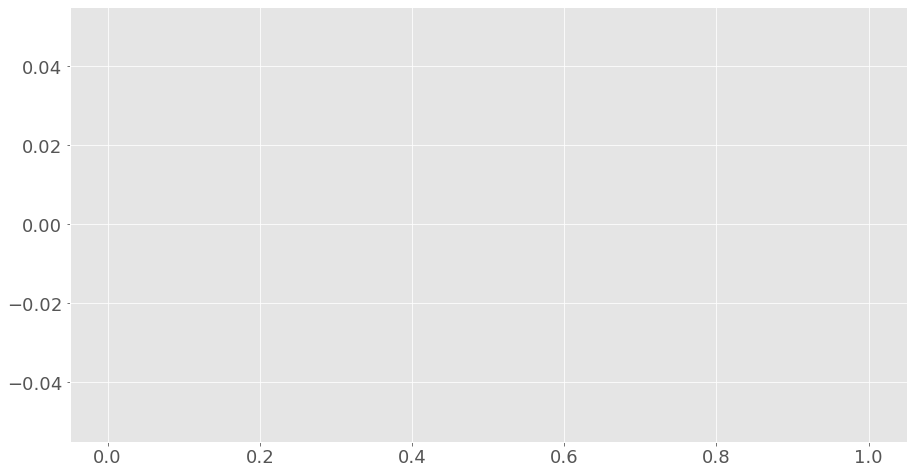

In [18]:
nose_conf_s = pd.Series(nose_conf)
display(nose_conf_s.describe())
nose_conf_fig = nose_conf_s.hist(bins=30,figsize=(15,8))
save_fig(nose_conf_fig, "nose_conf_hist.png", figs_path)